In [1]:
import xarray
import sys
from config import dni_data_path,MAURITIUS_CONTOUR_FILE
dni_dataset = xarray.open_mfdataset(str(dni_data_path) + "/*.nc", combine="nested", concat_dim="time")
dni_dataset = dni_dataset.to_dataframe().reset_index()
dni_dataset = dni_dataset.set_index('time')

In [2]:
dni_dataset

,lon,lat,SID
time,,,
2019-01-01 00:00:00,57.099998,-20.750000,0.0
2019-01-01 00:00:00,57.099998,-20.700001,0.0
2019-01-01 00:00:00,57.099998,-20.650000,0.0
2019-01-01 00:00:00,57.099998,-20.600000,0.0
2019-01-01 00:00:00,57.099998,-20.549999,0.0
...,...,...,...
2019-12-31 23:30:00,58.000000,-19.950001,0.0
2019-12-31 23:30:00,58.000000,-19.900000,0.0
2019-12-31 23:30:00,58.000000,-19.850000,0.0


In [3]:
dni_dataset_mean = dni_dataset.groupby(['lat', 'lon']).mean().reset_index()
dni_dataset_mean

,lat,lon,SID
0,-20.75,57.099998,157.649109
1,-20.75,57.150002,157.593948
2,-20.75,57.200001,155.248734
3,-20.75,57.250000,153.925262
4,-20.75,57.299999,152.191727
...,...,...,...
394,-19.75,57.799999,155.551208
395,-19.75,57.849998,155.493393
396,-19.75,57.900002,155.819626
397,-19.75,57.950001,155.423111


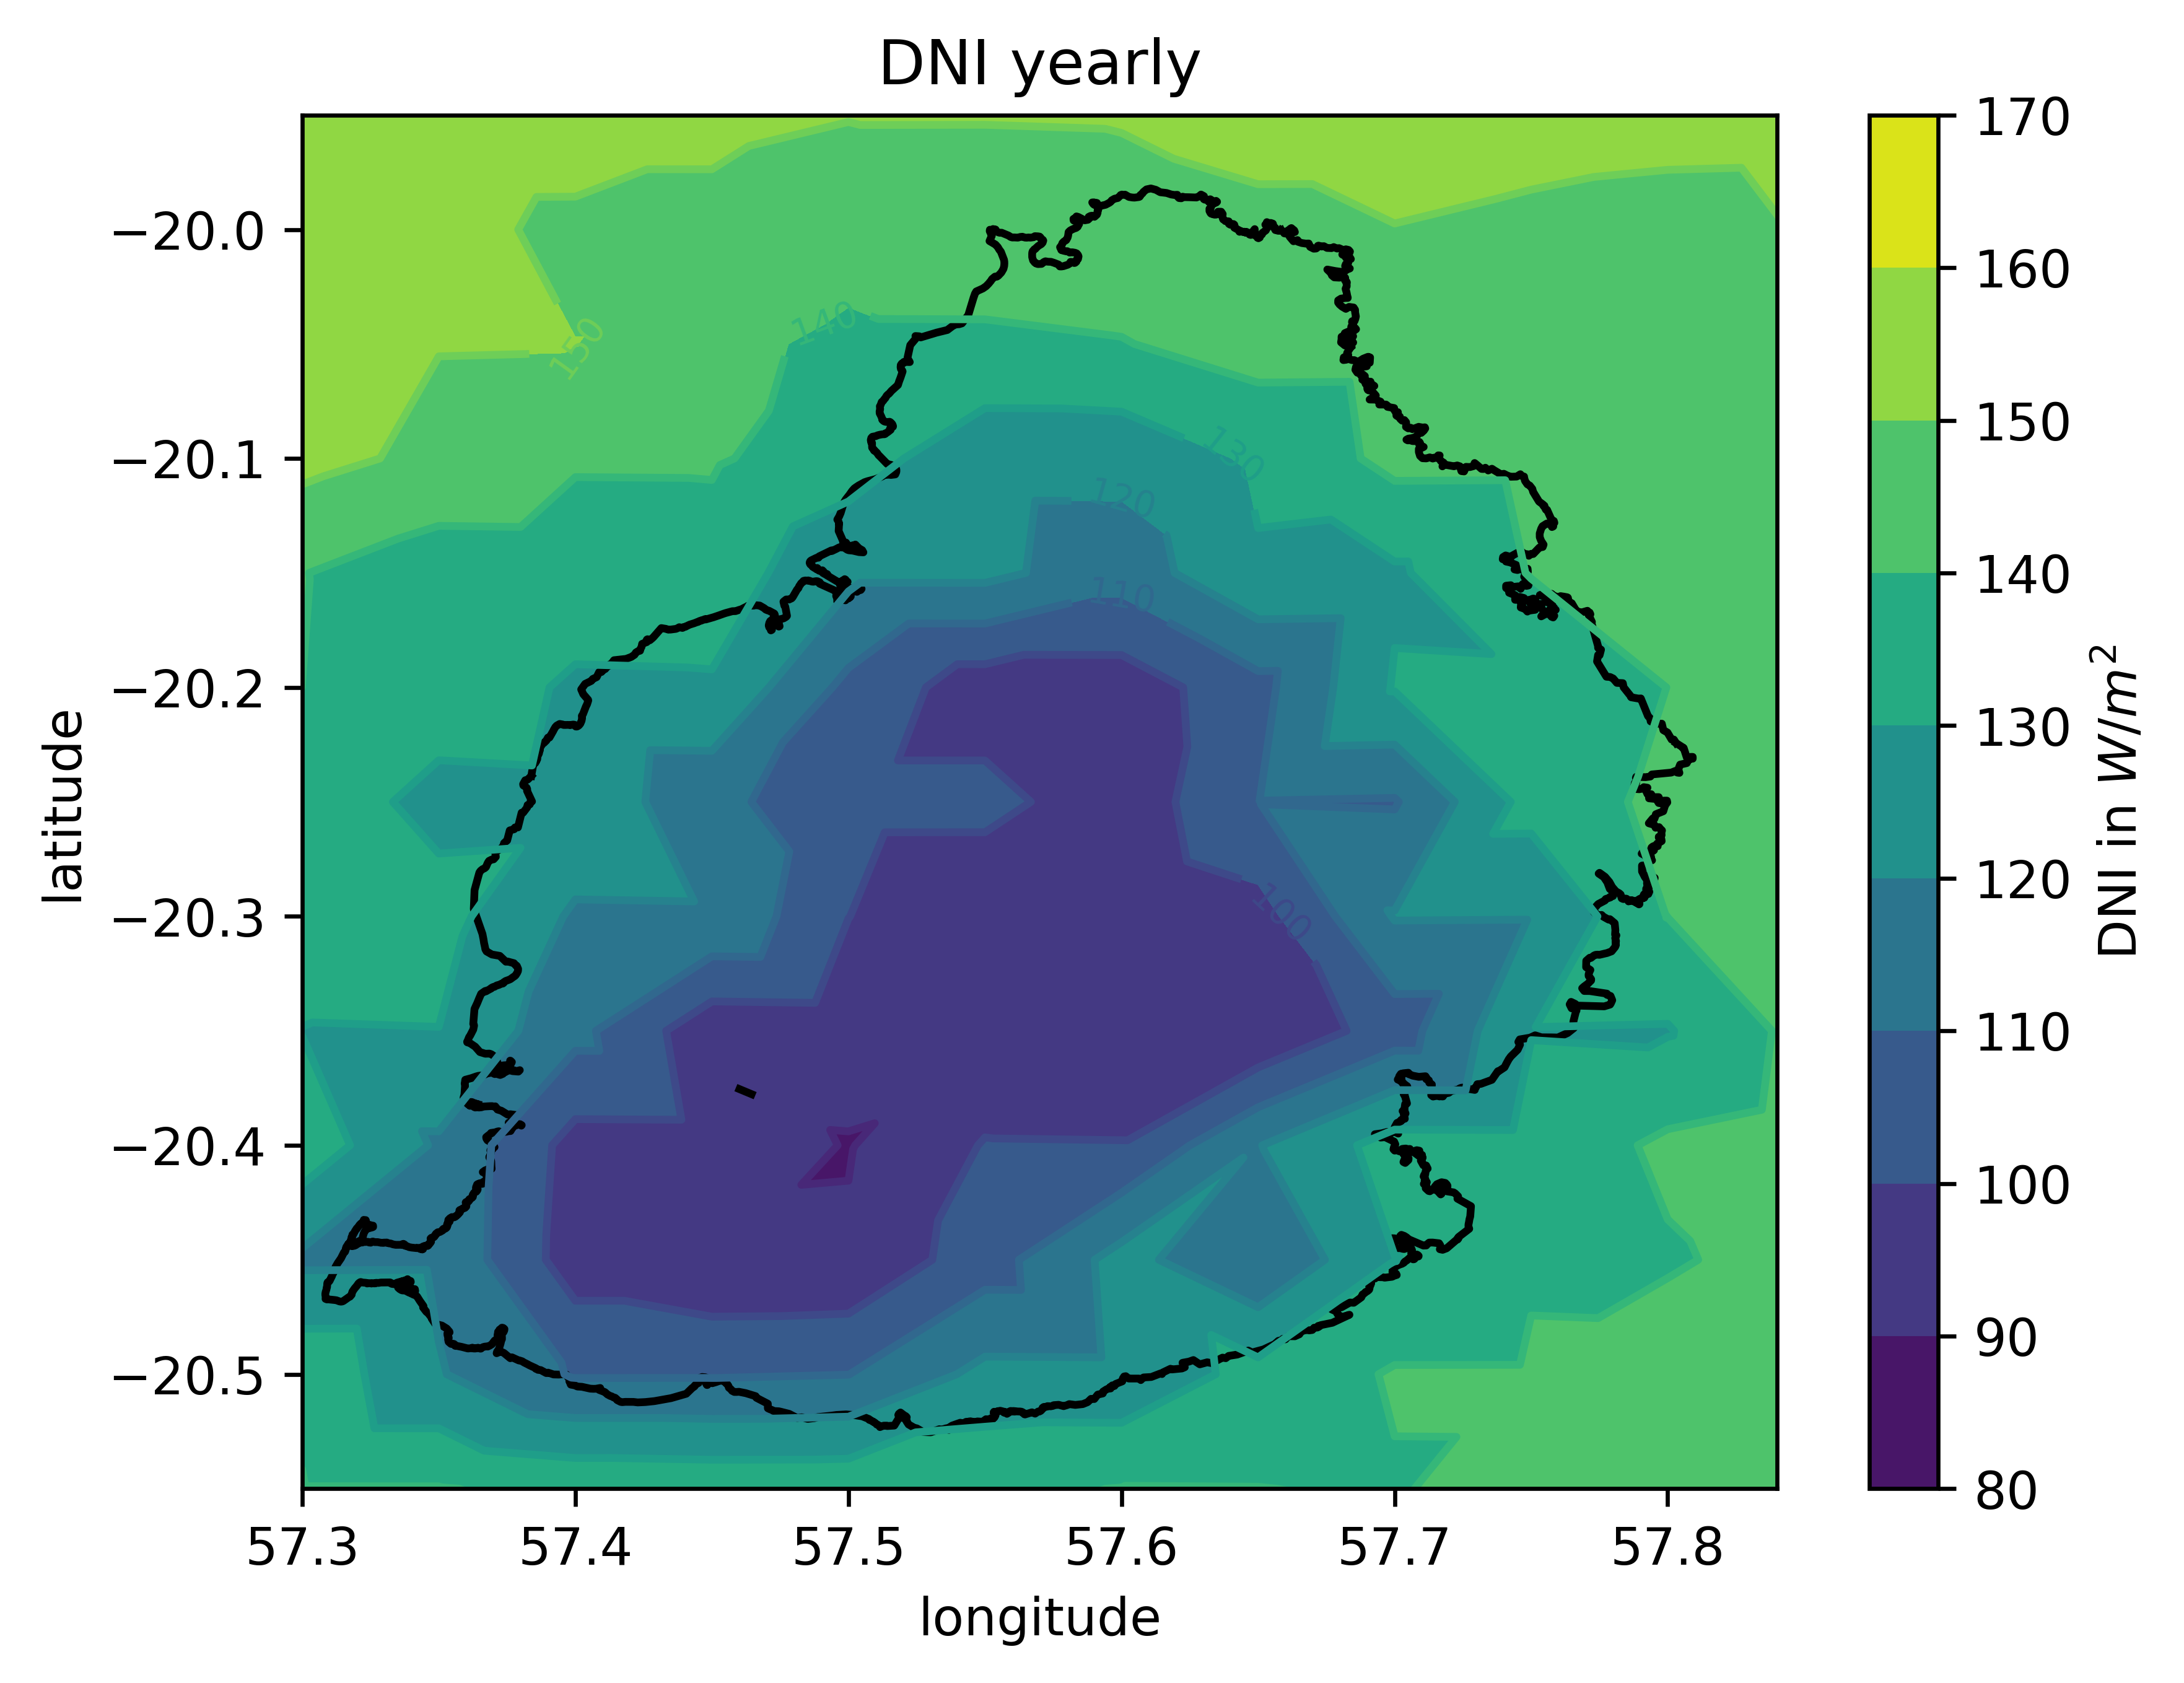

In [4]:
from utils import plot_map
from matplotlib import pyplot as plt

fig = plt.figure()
fig.set_dpi(600)
ax = fig.add_subplot()
ax.set_title(f"DNI yearly")
ax.set_ylabel('latitude')
ax.set_xlabel('longitude')
plot_map(ax, MAURITIUS_CONTOUR_FILE)

contourf = ax.tricontourf(dni_dataset_mean['lon'], dni_dataset_mean['lat'], dni_dataset_mean['SID'], cmap='viridis')
contour = ax.tricontour(dni_dataset_mean['lon'], dni_dataset_mean['lat'], dni_dataset_mean['SID'], cmap='viridis')

ax.clabel(contour, inline=1, fontsize=7,)
plt.xlim([57.3, 57.84])
plt.ylim([-20.55, -19.95])
fig.colorbar(contourf, label='DNI in $W/m^2$')
plt.show()